# **Statistical Machine Learning: Exercise 3**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
%matplotlib inline

In [ ]:
!git clone https://github.com/julieeecious/sml-dataset.git

Cloning into 'sml-dataset'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [ ]:
ls sml-dataset/hw3

iris.txt  ldaData.txt  lin_reg_test.txt  lin_reg_train.txt


## Task 1 Linear Regression

In [ ]:
train = np.loadtxt('sml-dataset/hw3/lin_reg_train.txt')
test = np.loadtxt('sml-dataset/hw3/lin_reg_test.txt')

In [ ]:
x_train, y_train = train[:,0], train[:,1]
x_test, y_test = test[:,0], test[:,1]

In [ ]:
def rmse(y_pred, y_actual):
    return np.sqrt(((y_pred - y_actual) ** 2).mean())

def linear_regression(x, y, feature_function, ridge_coeff=0.01):
    x = np.reshape(x, (1, x.shape[0]))
    Phi = feature_function(x)
    pseudo_inv = np.linalg.inv(Phi @ Phi.T + ridge_coeff * np.eye(Phi.shape[0]))
    # print(f'inv shape {pseudo_inv.shape}')
    w = pseudo_inv @ Phi @ y
    y_pred = Phi.T @ w
    e = rmse(y_pred, y)
    return w, e 

def plot_regression(x_train, y_train, x_test, y_test, feature_function, ridge_coeff=0.01):
  
  w1, err_train = linear_regression(x_train, y_train, feature_function)
  _, err_test = linear_regression(x_test, y_test, feature_function)

  x_train_ = np.reshape(x_train, (1, x_train.shape[0]))
  Phi = feature_function(x_train_) 

  # plot prediction model
  xplot = np.linspace(-1, 1, 50)
  xplot_ = np.reshape(xplot, (1, xplot.shape[0]))
  y_hat = w1.T @ feature_function(xplot_)

  title = feature_function.__name__.split('_')[0].capitalize()
  plt.title(f'Model using {title} Feature')
  plt.scatter(x_train, y_train, c='black', label='train data')
  plt.scatter(x_train, w1.T@Phi, label='prediction', c='r')
  plt.plot(xplot, y_hat, label='model', c='b')
  plt.legend()
  plt.show()

In [ ]:
def linear_features(x):
    return np.r_[x, np.ones((1, x.shape[1]))]

# degree of 2
def quadratic_features(x):
  return np.r_[x**2, linear_features(x)]

# degree of 3
def cubic_features(x):
  return np.r_[x**3, quadratic_features(x)]

# degree of 4
def quartic_features(x):
  return np.r_[x**4, cubic_features(x)]

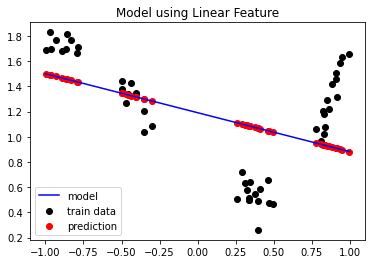

In [ ]:
plot_regression(x_train, y_train, x_test, y_test, linear_features)

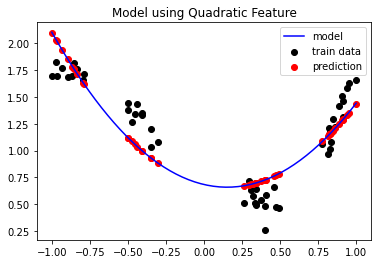

In [ ]:
plt.title('Model with quadratic features')
plot_regression(x_train, y_train, x_test, y_test, quadratic_features)

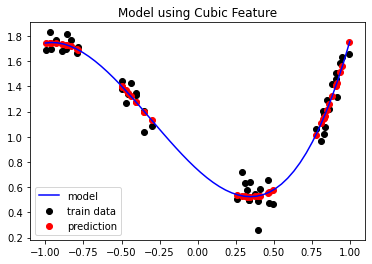

In [ ]:
plt.title('Model with cubic features')
plot_regression(x_train, y_train, x_test, y_test, cubic_features)

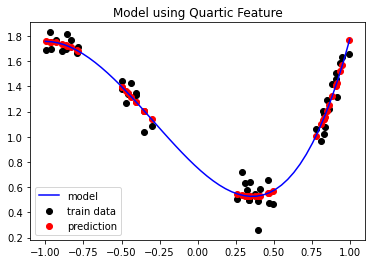

In [ ]:
plt.title('Model with quartic features')
plot_regression(x_train, y_train, x_test, y_test, quartic_features)

In [ ]:
w1, err_train = linear_regression(x_train, y_train, linear_features)
_, err_test = linear_regression(x_test, y_test, linear_features)
w2, err_train_2 = linear_regression(x_train, y_train, quadratic_features)
_, err_test_2 = linear_regression(x_test, y_test, quadratic_features)
w3, err_train_3 = linear_regression(x_train, y_train, cubic_features)
_, err_test_3 = linear_regression(x_test, y_test, cubic_features)
w4, err_train_4 = linear_regression(x_train, y_train, quartic_features)
_, err_test_4 = linear_regression(x_test, y_test, quartic_features)

In [ ]:
t = PrettyTable()
t.field_names = ["RMSE", "Training Set", "Test Set"]
t.add_row(["linear", round(err_train,6), round(err_test, 6)])
t.add_row(["Deg 2", round(err_train_2,6), round(err_test_2, 6)])
t.add_row(["Deg 3", round(err_train_3,6), round(err_test_3, 6)])
t.add_row(["Deg 4", round(err_train_4,6), round(err_test_4, 6)])

print(t)

+--------+--------------+----------+
|  RMSE  | Training Set | Test Set |
+--------+--------------+----------+
| linear |   0.412178   | 0.373393 |
| Deg 2  |   0.212014   | 0.197702 |
| Deg 3  |   0.087068   | 0.102533 |
| Deg 4  |   0.087013   | 0.100341 |
+--------+--------------+----------+


 ### 5-fold cross-validation


In [ ]:
# Split data into 5 groups
x_train, y_train = train[:,0], train[:,1]
x_t_1, x_t_2, x_t_3, x_t_4, x_t_5 = np.split(x_train, 5)
y_t_1, y_t_2, y_t_3, y_t_4, y_t_5 = np.split(y_train, 5)

In [ ]:
x_t = [x_t_1, x_t_2, x_t_3, x_t_4, x_t_5]
y_t = [y_t_1, y_t_2, y_t_3, y_t_4, y_t_5]

In [ ]:
def plot_regression_cross_validation(x_train, y_train, feature_function, val_ind, ridge_coeff=0.01, plot=False):
  def gather_dataset(val_ind):
    x_t_, y_t_ = x_train[:], y_train[:]
    x_val_set, y_val_set = x_t_.pop(val_ind), y_t_.pop(val_ind)
    x_train_set, y_train_set = np.array([]), np.array([])
    for i in x_t_:
      x_train_set = np.r_[i, x_train_set]
    for i in y_t_:
      y_train_set = np.r_[i, y_train_set]
    return x_train_set, y_train_set, x_val_set, y_val_set

  xt, yt, xv, yv = gather_dataset(val_ind)

  w, err_train = linear_regression(xt, yt, feature_function)

  def fit(xv, yv):
    """
    Use training model and input data to predict the outcome
    """
    x_val = np.reshape(xv, (1, xv.shape[0]))
    y_v = w.T @ feature_function(x_val)
    err_val = rmse(y_v, yv)
    return y_v, err_val

  # Using validation input
  y_v, err_val = fit(xv, yv)

  # Using testing input
  y_test_, err_test = fit(x_test, y_test)

  # Using random linear data to get the prediction
  xplot = np.linspace(-1, 1, 50)
  y_hat, _ = fit(xplot, 0)
  
  if plot:
    # plt.figure(figsize=(10,8))
    plt.title(f'Cross validation set {val_ind+1}')
    plt.scatter(xt, yt, label='Training data', c='black')
    plt.scatter(xv, y_v, label='Validation dataset prediction', c='g')
    plt.scatter(x_test, y_test_, label='Testing dataset prediction', c='r')
    plt.plot(xplot, y_hat, label='Trained model', c='b')
    plt.legend()
    plt.show()

  return err_train, err_val, err_test

In [ ]:
def five_fold_cross_val(feature_function, show_plot=False):

  t = PrettyTable()
  all_et, all_ev, all_ete = [], [], []
  feature_name = feature_function.__name__.split('_')[0].capitalize()
  t.field_names = [feature_name, "Training Set", "Validation Set","Testing Set", "Average Error"]

  for i in range(5):
    et, ev, ete = plot_regression_cross_validation(x_t, y_t, feature_function, i, show_plot)
    all_et.append(et)
    all_ev.append(ev)
    all_ete.append(ete)
    t.add_row([f'Fold {i+1}', round(et,6), round(ev,6), round(ete, 6), round((et+ev+ete)/3, 6)])

  t.add_row(['','','','',''])

  avg_et, avg_ev, avg_ete = round(sum(all_et)/5,6), round(sum(all_ev)/5,6), round(sum(all_ete)/5, 6)
  avg = round(sum([avg_et, avg_ev, avg_ete])/3, 6)
  t.add_row([f'Average', avg_et, avg_ev, avg_ete, avg])

  print(t)

  return t, avg_et, avg_ev, avg_ete

In [ ]:
t2, avg_et2, avg_ev2, avg_ete2 = five_fold_cross_val(quadratic_features)

+-----------+--------------+----------------+-------------+---------------+
| Quadratic | Training Set | Validation Set | Testing Set | Average Error |
+-----------+--------------+----------------+-------------+---------------+
|   Fold 1  |   0.196857   |    0.279502    |   0.205428  |    0.227262   |
|   Fold 2  |   0.224944   |    0.169194    |   0.211983  |    0.20204    |
|   Fold 3  |   0.20084    |    0.258728    |   0.224573  |    0.228047   |
|   Fold 4  |   0.198992   |    0.266541    |   0.229364  |    0.231632   |
|   Fold 5  |   0.225567   |    0.150461    |   0.220408  |    0.198812   |
|           |              |                |             |               |
|  Average  |   0.20944    |    0.224885    |   0.218351  |    0.217559   |
+-----------+--------------+----------------+-------------+---------------+


In [ ]:
t3, avg_et3, avg_ev3, avg_ete3 = five_fold_cross_val(cubic_features)

+---------+--------------+----------------+-------------+---------------+
|  Cubic  | Training Set | Validation Set | Testing Set | Average Error |
+---------+--------------+----------------+-------------+---------------+
|  Fold 1 |   0.079782   |    0.113827    |   0.107311  |    0.100307   |
|  Fold 2 |   0.092147   |    0.064581    |   0.109747  |    0.088825   |
|  Fold 3 |   0.088817   |    0.087428    |   0.108589  |    0.094944   |
|  Fold 4 |   0.086013   |    0.094335    |   0.108817  |    0.096388   |
|  Fold 5 |   0.084282   |    0.103384    |   0.11192   |    0.099862   |
|         |              |                |             |               |
| Average |   0.086208   |    0.092711    |   0.109277  |    0.096065   |
+---------+--------------+----------------+-------------+---------------+


In [ ]:
t4, avg_et4, avg_ev4, avg_ete4 = five_fold_cross_val(quartic_features)

+---------+--------------+----------------+-------------+---------------+
| Quartic | Training Set | Validation Set | Testing Set | Average Error |
+---------+--------------+----------------+-------------+---------------+
|  Fold 1 |   0.077858   |    0.124982    |   0.104602  |    0.102481   |
|  Fold 2 |   0.09073    |    0.078779    |   0.107212  |    0.09224    |
|  Fold 3 |   0.088631   |    0.089275    |   0.109789  |    0.095898   |
|  Fold 4 |   0.08602    |    0.094258    |   0.108751  |    0.096343   |
|  Fold 5 |   0.084124   |    0.104784    |   0.113005  |    0.100638   |
|         |              |                |             |               |
| Average |   0.085473   |    0.098416    |   0.108672  |    0.09752    |
+---------+--------------+----------------+-------------+---------------+


In [ ]:
print(t2)
print(t3)
print(t4)

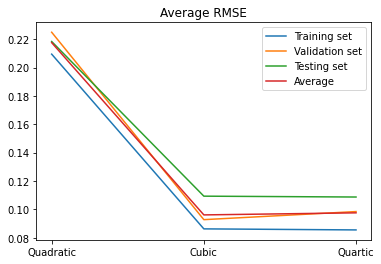

In [ ]:
plt.title('Average RMSE')
plt.xticks([0,1,2], ['Quadratic', 'Cubic', 'Quartic'])
plt.plot([0,1,2], [avg_et2, avg_et3, avg_et4], label='Training set')
plt.plot([0,1,2], [avg_ev2, avg_ev3, avg_ev4], label='Validation set')
plt.plot([0,1,2], [avg_ete2, avg_ete3, avg_ete4], label='Testing set')
plt.plot([0,1,2], [(avg_et2+avg_ev2+avg_ete2)/3, (avg_et3+avg_ev3+avg_ete3)/3, 
                   (avg_et4+avg_ev4+avg_ete4)/3], label='Average')
plt.legend()

Bayesian Linear Regression


In [ ]:
sigma = 0.1
Lambda = 0.01
alpha = 0.01
beta = 1 / (sigma ** 2)

In [ ]:
def identity_basis_function(x):
  return x

def expand(x, bf):
  return np.concatenate([np.ones(x.shape), bf(x)], axis=1)


In [ ]:
def posterior(Phi, y, alpha, beta, return_inv=False):
  """Computes mean and  covariance matrix of posterior distribution"""
  Lambda_n_inv = alpha * np.eye(Phi.shape[1]) + beta * Phi.T.dot(Phi)
  Lambda_n = np.linalg.inv(Lambda_n_inv)
  mu_n = beta * Lambda_n.dot(Phi.T).dot(y)
  
  if return_inv:
    return mu_n, Lambda_n, Lambda_n_inv
  else:
    return mu_n, Lambda_n

def posterior_prediction(Phi, mu_n, Lambda_n, beta):
  """Computes posterior mean & variances of posterior prediction distribution"""
  y = Phi @ mu_n
  ## Only compute variances (diagonal elements of covariance matrix)
  y_cov = np.sqrt(1 / beta + np.sum(Phi.dot(Lambda_n) * Phi, axis=1))
  # y_var = 1 / beta + Phi.T @ Lambda_n @ Phi

  return y, y_cov

def log_likelihood(Phi, y, alpha, beta):
  M, N = Phi.shape
  mu_n, _ = posterior(Phi, y, alpha, beta)

  sum = np.log(beta) - \
        beta * np.sum((y - Phi.dot(mu_n))**2) - \
        N * np.log(2 * np.pi)
  return sum / 2

In [ ]:
# Using linear feature in 1d
# https://moodle.informatik.tu-darmstadt.de/mod/forum/discuss.php?d=30068

Phi = expand(x_train[:, np.newaxis], identity_basis_function)
mu_n, cov_n = posterior(Phi, y_train[:, np.newaxis], alpha, beta)

# Predict y based on training set
y_train_pred, y_train_cov = posterior_prediction(Phi, mu_n, cov_n, beta)
err_train = rmse(y_train_pred, y_train)
ll_train = log_likelihood(Phi, y_train, alpha, beta)

# Predict y based on test set
Phi_test = expand(x_test[:, np.newaxis], identity_basis_function)
y_test_pred, y_test_cov = posterior_prediction(Phi_test, mu_n, cov_n, beta)
err_test = rmse(y_test_pred, y_train)
ll_test = log_likelihood(Phi_test, y_test, alpha, beta)

x_s = np.linspace(-1,1,100).reshape(-1,1)
Phi_s = expand(x_s, identity_basis_function)
y, y_cov = posterior_prediction(Phi_s, mu_n, cov_n, beta)

upper_bound, lower_bound = [], []
for i in range(1,4):
  upper_bound.append(y + y_cov[:,np.newaxis] * i)
  lower_bound.append(y - y_cov[:,np.newaxis] * i)

In [ ]:
print('RMSE under Bayesian model')
print(f'Training Set: {round(err_train, 6)}')
print(f'Testing Set: {round(err_test, 6)}')

RMSE under Bayesian model
Training Set: 0.507177
Testing Set: 0.494752


In [ ]:
ll_avg = (ll_train + ll_test) / 2
print(f'Average Log Likelihood under Bayesian model: {round(ll_avg, 6)}')
print(f'LL for training set: {round(ll_train, 6)}')
print(f'LL for testing set: {round(ll_test, 6)}')

Average Log Likelihood under Bayesian model: -560.45518
LL for training set: -424.261899
LL for testing set: -696.648461


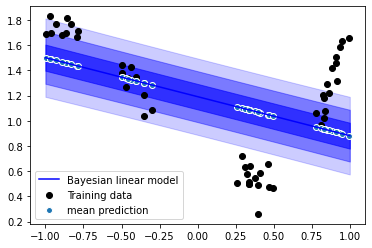

In [ ]:
a = 0.6
for i in range(3):
  plt.fill_between(x_s.ravel(), upper_bound[i].ravel(), lower_bound[i].ravel(), alpha=a, color='b')
  a -= 0.2
plt.plot(x_s, y, c='blue', label='Bayesian linear model')
plt.scatter(x_train, y_train, c='black', label='Training data')
plt.scatter(x_train, y_train_pred, edgecolor='white' ,label='mean prediction')
plt.legend()
plt.show()

Bayesian linear ridge regression using squared exponential (SE) features

In [ ]:
def squared_exponential_features(x, k=20, beta=10):
  tmp = np.zeros((x.shape[0], k))
  for i in range(tmp.shape[0]):
    for j in range(tmp.shape[1]):
      alpha = j * 0.1 - 1
      tmp[i][j] = np.exp(-1/2*beta*(x[i]-alpha)**2)
  return tmp

def fit(Phi, y, alpha=alpha, beta=beta):
  """Computes the posterior prediction based on parameters"""
  mu_n, cov_n = posterior(Phi, y, alpha, beta)
  y_train_pred, y_train_cov = posterior_prediction(Phi, mu_n, cov_n, beta)

  return y_train_pred, y_cov

In [ ]:
Phi_SE = expand(x_train[:, np.newaxis], squared_exponential_features)
mu_n_SE, cov_n_SE = posterior(Phi_SE, y_train[:, np.newaxis], alpha, beta)

# Predict y based on training set, using parameters learned from the training set
y_train_pred_SE, y_train_cov_SE = posterior_prediction(Phi_SE, mu_n_SE, cov_n_SE, beta)
err_train_SE = rmse(y_train_pred_SE, y_train)
ll_train_SE = log_likelihood(Phi_SE, y_train, alpha, beta)

# Predict y based on test set, using parameters learned from the training set
Phi_test_SE = expand(x_test[:, np.newaxis], squared_exponential_features)
y_test_pred_SE, y_test_cov_SE = posterior_prediction(Phi_test_SE, mu_n_SE, cov_n_SE, beta)
err_test_SE = rmse(y_test_pred_SE, y_train)
ll_test_SE = log_likelihood(Phi_test_SE, y_test, alpha, beta)

In [ ]:
print('RMSE under Bayesian model')
print(f'Training Set: {round(err_train_SE, 6)}')
print(f'Testing Set: {round(err_test_SE, 6)}')

RMSE under Bayesian model
Training Set: 0.648366
Testing Set: 0.655725


In [ ]:
ll_avg_SE = (ll_train_SE + ll_test_SE) / 2
print(f'Average Log Likelihood under Bayesian model: {round(ll_avg_SE, 6)}')
print(f'LL for training set: {round(ll_train_SE, 6)}')
print(f'LL for testing set: {round(ll_test_SE, 6)}')

Average Log Likelihood under Bayesian model: -49.045528
LL for training set: -33.714208
LL for testing set: -64.376848


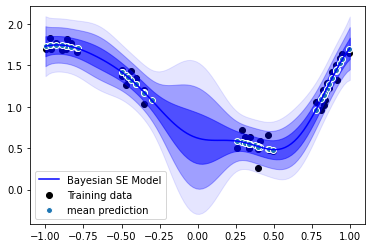

In [ ]:
x_s = np.linspace(-1,1,100).reshape(-1,1)
Phi_s = expand(x_s, squared_exponential_features)
y_s_p, y_s_cov = posterior_prediction(Phi_s, mu_n_SE, cov_n_SE, beta)

upper_bound_SE, lower_bound_SE = [], []
for i in range(1,4):
  upper_bound_SE.append(y_s_p + y_s_cov[:,np.newaxis] * i)
  lower_bound_SE.append(y_s_p - y_s_cov[:,np.newaxis] * i)

plt.scatter(x_train, y_train, c='black', label='Training data')
plt.plot(x_s, y_s_p, c='blue', label='Bayesian SE Model')
plt.fill_between(x_s.ravel(), upper_bound_SE[0].ravel(), lower_bound_SE[0].ravel(), alpha=0.5, color='b')
plt.fill_between(x_s.ravel(), upper_bound_SE[1].ravel(), lower_bound_SE[1].ravel(), alpha=0.3, color='b')
plt.fill_between(x_s.ravel(), upper_bound_SE[2].ravel(), lower_bound_SE[2].ravel(), alpha=0.1, color='b')
plt.scatter(x_train, y_train_pred_SE, edgecolor='white' ,label='mean prediction')
plt.legend()


TODO: 

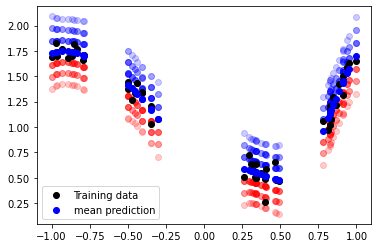

In [ ]:
upper_bound, lower_bound = [], []
for i in range(1,4):
  upper_bound.append(y_train_pred + y_train_cov[:,np.newaxis] * i)
  lower_bound.append(y_train_pred - y_train_cov[:,np.newaxis] * i)


a = 0.6
for i in range(3):
  plt.scatter(x_train, upper_bound[i], c='b', alpha=a)
  plt.scatter(x_train, lower_bound[i], c='r', alpha=a)
  # plt.fill_between(x_train, upper_bound[i].ravel(), \
  #                  lower_bound[i].ravel(), alpha=a, color='b')
  a -= 0.2
plt.scatter(x_train, y_train, c='black', label='Training data')
plt.scatter(x_train, y_train_pred.ravel() ,label='mean prediction', c='b')

plt.legend()
plt.show()

Grid Search using beta in {1, 10, 100}

In [ ]:
def SE_1(x):
  # return squared_exponential_features(x, 20, 1)
  tmp = np.zeros((x.shape[0], 20))
  for i in range(tmp.shape[0]):
    for j in range(tmp.shape[1]):
      alpha = j * 0.1 - 1
      tmp[i][j] = np.exp(-1/2*1*(x[i]-alpha)**2)
  return tmp

def SE_10(x):
  return squared_exponential_features(x, 20, 10)

def SE_100(x):
  # return squared_exponential_features(x, 20, 100)
  tmp = np.zeros((x.shape[0], 20))
  for i in range(tmp.shape[0]):
    for j in range(tmp.shape[1]):
      alpha = j * 0.1 - 1
      tmp[i][j] = np.exp(-1/2*100*(x[i]-alpha)**2)
  return tmp

def log_marginal_likelihood(Phi, y, alpha, beta):
  M, N = Phi.shape
  mu_n, _, cov_n_inv = posterior(Phi, y, alpha, beta, return_inv=True)

  E_mu = beta * np.sum((y - Phi.dot(mu_n)) ** 2) - alpha * np.sum(mu_n ** 2)

  sum = M * np.log(alpha) + \
        N * np.log(beta) - \
        E_mu - \
        np.log(np.linalg.det(cov_n_inv)) - \
        np.log(2 * np.pi)
  return sum / 2 

In [ ]:
def grid_search(search_feature):
  Phi_SE = expand(x_train[:, np.newaxis], search_feature)
  mu_n_SE, cov_n_SE = posterior(Phi_SE, y_train[:, np.newaxis], alpha, beta)

  # Predict y based on training set, using parameters learned from the training set
  y_train_pred_SE, y_train_cov_SE = posterior_prediction(Phi_SE, mu_n_SE, cov_n_SE, beta)
  # err_train_grid.append(rmse(y_train_pred_SE, y_train))

  # Predict y based on test set, using parameters learned from the training set
  Phi_test_SE = expand(x_test[:, np.newaxis], search_feature)
  y_test_pred_SE, y_test_cov_SE = posterior_prediction(Phi_test_SE, mu_n_SE, cov_n_SE, beta)
  # err_test_grid.append(rmse(y_test_pred_SE, y_train))

  return Phi_SE, y_train_pred_SE, y_train_cov_SE, Phi_test_SE, y_test_pred_SE, y_test_cov_SE

In [ ]:
err_train_grid, err_test_grid = [], []
ll_train_grid, ll_test_grid = [], []
lml_train_grid, lml_test_grid = [], []
y_train_pred, y_test_pred = [], []
y_train_cov, y_test_cov = [], []

def eval_result(search_feature, b):
  Phi_tr, y_tr_p, y_tr_cov, Phi_te, y_te_p, y_te_cov = grid_search(search_feature)

  y_train_pred.append(y_tr_p)
  y_test_pred.append(y_te_p)
  y_train_cov.append(y_tr_cov)
  y_test_cov.append(y_te_cov)

  err_train_grid.append(rmse(y_tr_p, y_train))
  err_test_grid.append(rmse(y_te_p, y_test))

  ll_train_grid.append(log_likelihood(Phi_tr, y_train, alpha, b))
  ll_test_grid.append(log_likelihood(Phi_te, y_test, alpha, b))

  lml_train_grid.append(log_marginal_likelihood(Phi_tr, y_train, alpha, b))
  lml_test_grid.append(log_marginal_likelihood(Phi_te, y_test, alpha, b))


eval_result(SE_1, 1)
eval_result(SE_10, 10)
eval_result(SE_100, 100)

err_train_grid

[0.6465859879238016, 0.6483657288705154, 0.6495017538084256]

In [ ]:
grid = [1, 10, 100]

for i in range(3):
  t = PrettyTable()
  t.field_names = [f'\u03B2 = {grid[i]}', "Training Set", "Testing Set"]
  t.add_row(['RMSE', round(err_train_grid[i],6), round(err_test_grid[i],6)])
  t.add_row(['LL', round(ll_train_grid[i],6), round(ll_test_grid[i],6)])
  t.add_row(['LML', round(lml_train_grid[i],6), round(lml_test_grid[i],6)])
  print(t)


+-------+--------------+-------------+
| β = 1 | Training Set | Testing Set |
+-------+--------------+-------------+
|  RMSE |   0.646586   |   0.58422   |
|   LL  |  -19.743482  |  -20.145019 |
|  LML  |  -80.475552  | -196.864275 |
+-------+--------------+-------------+
+--------+--------------+-------------+
| β = 10 | Training Set | Testing Set |
+--------+--------------+-------------+
|  RMSE  |   0.648366   |   0.618388  |
|   LL   |  -19.829304  |  -22.944985 |
|  LML   |  -75.647769  | -198.174734 |
+--------+--------------+-------------+
+---------+--------------+-------------+
| β = 100 | Training Set | Testing Set |
+---------+--------------+-------------+
|   RMSE  |   0.649502   |   1.288787  |
|    LL   |  -29.232631  |  -59.428662 |
|   LML   | -102.165657  | -273.747762 |
+---------+--------------+-------------+


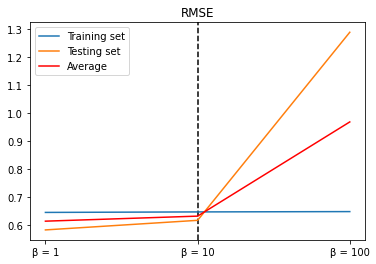

In [ ]:
plt.title('RMSE')
plt.xticks([0,1,2], ['\u03B2 = 1', '\u03B2 = 10', '\u03B2 = 100'])
plt.axvline(x=1, c='black', linestyle='dashed')
plt.plot([0,1,2], [err_train_grid[0], err_train_grid[1], err_train_grid[2]], label='Training set')
plt.plot([0,1,2], [err_test_grid[0], err_test_grid[1], err_test_grid[2]], label='Testing set')
plt.plot([0,1,2], [(err_test_grid[0]+err_train_grid[0])/2,
                   (err_train_grid[1]+err_test_grid[1])/2,
                   (err_train_grid[2]+err_test_grid[2])/2], label='Average', c='r')
plt.legend()

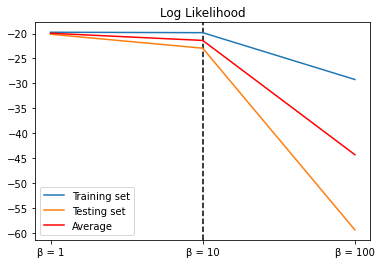

In [ ]:
plt.title('Log Likelihood')
plt.xticks([0,1,2], ['\u03B2 = 1', '\u03B2 = 10', '\u03B2 = 100'])
plt.axvline(x=1, c='black', linestyle='dashed')
plt.plot([0,1,2], [ll_train_grid[0], ll_train_grid[1], ll_train_grid[2]], label='Training set')
plt.plot([0,1,2], [ll_test_grid[0], ll_test_grid[1], ll_test_grid[2]], label='Testing set')
plt.plot([0,1,2], [(ll_train_grid[0]+ll_test_grid[0])/2,
                   (ll_train_grid[1]+ll_test_grid[1])/2,
                   (ll_train_grid[2]+ll_test_grid[2])/2], label='Average', c='r')
plt.legend()

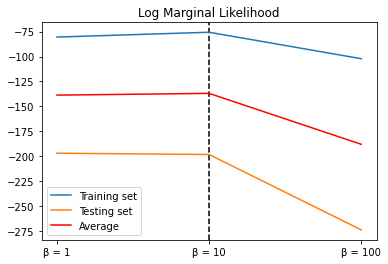

In [ ]:
plt.title('Log Marginal Likelihood')
plt.xticks([0,1,2], ['\u03B2 = 1', '\u03B2 = 10', '\u03B2 = 100'])
plt.axvline(x=1, c='black', linestyle='dashed')
plt.plot([0,1,2], [lml_train_grid[0], lml_train_grid[1], lml_train_grid[2]], label='Training set')
plt.plot([0,1,2], [lml_test_grid[0], lml_test_grid[1], lml_test_grid[2]], label='Testing set')
plt.plot([0,1,2], [(lml_train_grid[0]+lml_test_grid[0])/2,
                   (lml_train_grid[1]+lml_test_grid[1])/2,
                   (lml_train_grid[2]+lml_test_grid[2])/2], label='Average', c='r')
plt.legend()

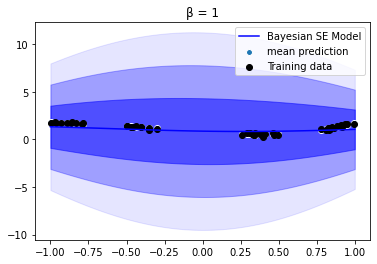

In [ ]:
x_s = np.linspace(-1,1,100).reshape(-1,1)
Phi_s = expand(x_s, SE_1)
y_s_p, y_s_cov = posterior_prediction(Phi_s, mu_n_SE, cov_n_SE, beta)

upper_bound_SE, lower_bound_SE = [], []

for j in range(1,4):
  upper_bound_SE.append(y_s_p + y_s_cov[:,np.newaxis] * j)
  lower_bound_SE.append(y_s_p - y_s_cov[:,np.newaxis] * j)

plt.title(f'\u03B2 = {grid[0]}')
plt.plot(x_s, y_s_p, c='blue', label='Bayesian SE Model')
plt.fill_between(x_s.ravel(), upper_bound_SE[0].ravel(), lower_bound_SE[0].ravel(), alpha=0.5, color='b')
plt.fill_between(x_s.ravel(), upper_bound_SE[1].ravel(), lower_bound_SE[1].ravel(), alpha=0.3, color='b')
plt.fill_between(x_s.ravel(), upper_bound_SE[2].ravel(), lower_bound_SE[2].ravel(), alpha=0.1, color='b')
plt.scatter(x_train, y_train_pred[0], edgecolor='white' ,label='mean prediction')
plt.scatter(x_train, y_train, c='black', label='Training data')
plt.legend()


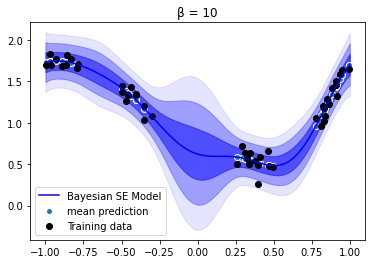

In [ ]:
Phi_s = expand(x_s, squared_exponential_features)
y_s_p, y_s_cov = posterior_prediction(Phi_s, mu_n_SE, cov_n_SE, beta)

upper_bound_SE, lower_bound_SE = [], []

for j in range(1,4):
  upper_bound_SE.append(y_s_p + y_s_cov[:,np.newaxis] * j)
  lower_bound_SE.append(y_s_p - y_s_cov[:,np.newaxis] * j)

plt.title(f'\u03B2 = 10')
plt.plot(x_s, y_s_p, c='blue', label='Bayesian SE Model')
plt.fill_between(x_s.ravel(), upper_bound_SE[0].ravel(), lower_bound_SE[0].ravel(), alpha=0.5, color='b')
plt.fill_between(x_s.ravel(), upper_bound_SE[1].ravel(), lower_bound_SE[1].ravel(), alpha=0.3, color='b')
plt.fill_between(x_s.ravel(), upper_bound_SE[2].ravel(), lower_bound_SE[2].ravel(), alpha=0.1, color='b')
plt.scatter(x_train, y_train_pred[1], edgecolor='white' ,label='mean prediction')
plt.scatter(x_train, y_train, c='black', label='Training data')

plt.legend()

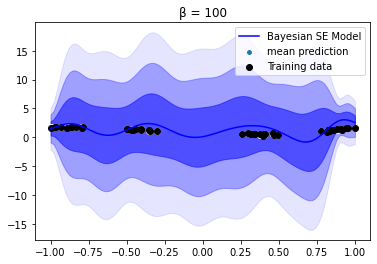

In [ ]:
Phi_s = expand(x_s, SE_100)
y_s_p, y_s_cov = posterior_prediction(Phi_s, mu_n_SE, cov_n_SE, beta)

upper_bound_SE, lower_bound_SE = [], []

for j in range(1,4):
  upper_bound_SE.append(y_s_p + y_s_cov[:,np.newaxis] * j)
  lower_bound_SE.append(y_s_p - y_s_cov[:,np.newaxis] * j)

plt.title(f'\u03B2 = 100')
plt.plot(x_s, y_s_p, c='blue', label='Bayesian SE Model')
plt.fill_between(x_s.ravel(), upper_bound_SE[0].ravel(), lower_bound_SE[0].ravel(), alpha=0.5, color='b')
plt.fill_between(x_s.ravel(), upper_bound_SE[1].ravel(), lower_bound_SE[1].ravel(), alpha=0.3, color='b')
plt.fill_between(x_s.ravel(), upper_bound_SE[2].ravel(), lower_bound_SE[2].ravel(), alpha=0.1, color='b')
plt.scatter(x_train, y_train_pred[2], edgecolor='white' ,label='mean prediction')
plt.scatter(x_train, y_train, c='black', label='Training data')
plt.legend()

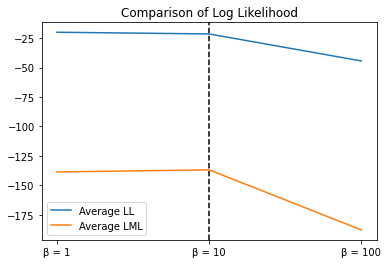

In [ ]:
plt.title('Comparison of Log Likelihood')
plt.xticks([0,1,2], ['\u03B2 = 1', '\u03B2 = 10', '\u03B2 = 100'])
plt.axvline(x=1, c='black', linestyle='dashed')
plt.plot([0,1,2], [(ll_train_grid[0]+ll_test_grid[0])/2,
                   (ll_train_grid[1]+ll_test_grid[1])/2,
                   (ll_train_grid[2]+ll_test_grid[2])/2], label='Average LL')
plt.plot([0,1,2], [(lml_train_grid[0]+lml_test_grid[0])/2,
                   (lml_train_grid[1]+lml_test_grid[1])/2,
                   (lml_train_grid[2]+lml_test_grid[2])/2], label='Average LML')
plt.legend()

## Task 2 Linear Classification

In [ ]:
data2 = np.loadtxt('sml-dataset/hw3/ldaData.txt')

In [ ]:
# Class Encoding
labels = [1]*50+[2]*43+[3]*44

# Data has 1 feature (x) and 3 classes (C1 50; C2 43; C3 44)
class_data = [data2[:50,:],data2[50:93,:],data2[93:,:]]
mean = np.mean(data2, axis=0)
means =[np.mean(x, axis=0) for x in class_data]
means = np.vstack((means[0], means[1], means[2]))

In [ ]:
def calc_Sw(X, means):
  """Compute within class covariance"""
  return sum([(X[i]-means[i]).T.dot(X[i]-means[i]) \
                  for i in range(len(X))])
  
def calc_Sb(means, mean):
  """"Compute between class covariance"""
  return sum([np.outer(means[i]-mean,means[i]-mean) \
                  for i in range(means.shape[0])])

def calc_coeff_w(Sw, Sb):
  eigen_val, eigen_vec = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
  w = eigen_vec[:, :1]
  return w
  
def find_projection(w):
  """Compute the projection and projection center"""
  # Projection data
  X_projection = data2.dot(w).reshape(-1)
  y = np.zeros_like(X_projection)
  # Projection center
  center = [means[i].T.dot(w) for i in range(3)]
  return X_projection, center

def calc_dist_to_projection(X_projection, center):
  """Calculate distance to projection center"""
  dists = [np.abs(X_projection - center[i]) for i in range(3)]
  dist = np.vstack((dists[0], dists[1], dists[2])).T
  return dist

def predict(dist):
  """Find minimal distence for prediction class"""
  return np.argmin(dist, axis=1)


In [ ]:
Sw = calc_Sw(class_data, means)
Sb = calc_Sb(means, mean)
w = calc_coeff_w(Sw, Sb)
X_proj, center = find_projection(w)
dist = calc_dist_to_projection(X_proj, center)
pred_labels = predict(dist) + 1

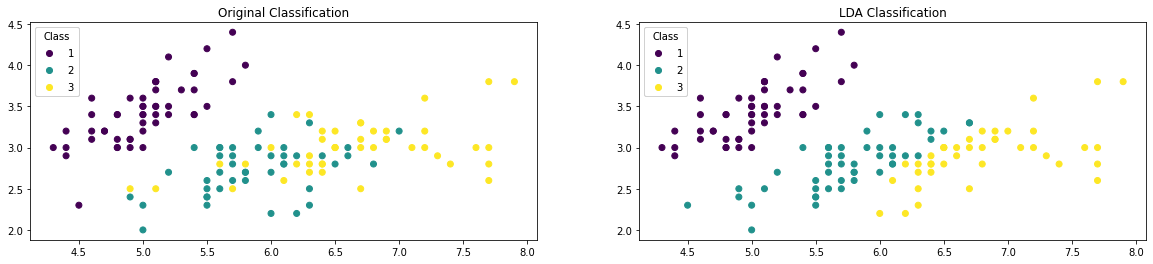

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(20)
axs[0].set_title('Original Classification')
scatter = axs[0].scatter(data2[:,0],data2[:,1],c=labels)
legend1 = axs[0].legend(*scatter.legend_elements(), title="Class")
axs[0].add_artist(legend1)

axs[1].set_title('LDA Classification')
scatter2 = axs[1].scatter(data2[:,0],data2[:,1],c=pred_labels)
legend2 = axs[1].legend(*scatter2.legend_elements(), title="Class")
axs[1].add_artist(legend2)


In [ ]:
wrong_classification = np.sum((pred_labels+1 != labels).astype(int))
print(f'{wrong_classification} data points was misclassified under LDA')

25 data points was misclassified under LDA


## Task 3 PCA

In [ ]:
# load data
dataset = np.loadtxt('sml-dataset/hw3/iris.txt',delimiter=',')

In [ ]:
data = dataset[:,:-1]
labels = dataset[:,-1:]
mean = np.mean(data,axis=0)
var = np.var(data,axis=0)

### 3a normalization

In [ ]:
normalized_data = (data-mean)/np.sqrt(var)

### 3b plot

In [ ]:
cov_matrix = np.cov(normalized_data,rowvar=False)
u,s,v = np.linalg.svd(cov_matrix)

In [ ]:
cov_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [ ]:
components_num = [n for n in range(5)]
proportion = []
for n in components_num:
    proportion.append(s[:n].sum()/s.sum())

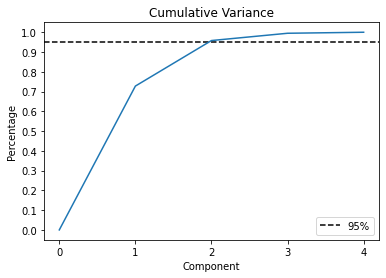

In [ ]:
plt.title('Cumulative Variance')
plt.xlabel('Component')
plt.ylabel('Percentage')
plt.xticks(np.arange(min(components_num), max(components_num)+1, 1.0))
plt.yticks(np.arange(min(proportion), max(proportion)+1, 0.1))
plt.axhline(y=0.95, c='black', linestyle='dashed', label='95%')
plt.plot(components_num,proportion) 
plt.legend()

Plot fist 10 components is enough, proportion (percentage) of the cumulative variance is samee(close to 1) after 10th components

if we want 95% of the dataset variance, we take first 2 components is enough, we can get 0.9722379 dataset variance

### 3c plot reduced dimensional data 

In [ ]:
Projection_matrix = u[:,:2]  # shape (4,2)
recuced_dimensional_data = normalized_data.dot(Projection_matrix)

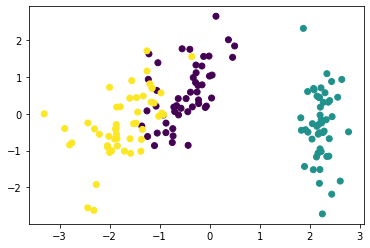

In [ ]:
plt.scatter(recuced_dimensional_data[:,0],\
            recuced_dimensional_data[:,1],\
            c=labels.reshape(-1))


### 3d compute normalized_root_mean_square_error for different number of components

In [ ]:
def reconstruct_data(PM, N, ND, u=u):
  """
  PM: Projection Matrix
  N: component is N
  ND: normalized dataset

  Compute the reconstructed data
  """
  # take first N component eigen vector
  PM = u[:,:N]  
  recuced_dimensional_data = ND.dot(PM)
  #  reduced data times transpose of Projection_matrix
  reconstructed_data = recuced_dimensional_data.dot(np.linalg.pinv(PM))
  # recover from normalization
  return reconstructed_data* np.sqrt(var) + mean   

def calc_NRMSE(original, reconstructed):    
    return np.sqrt(np.mean((reconstructed-original)**2,axis=0)) / \
           np.mean(reconstructed,axis=0)

In [ ]:
recon_data = []
errors = []

for i in range(1,5):
  rd = reconstruct_data(Projection_matrix, i, normalized_data)
  recon_data.append(rd)
  err = calc_NRMSE(data, rd)
  errors.append(err)

errors

[array([0.0640603 , 0.12641411, 0.0602105 , 0.16642021]),
 array([0.03945031, 0.01338632, 0.05946069, 0.1615809 ]),
 array([0.00531203, 0.00252157, 0.05380799, 0.04769084]),
 array([6.32820588e-17, 2.65485350e-17, 1.25688537e-16, 1.10662343e-16])]

ZCA whitening

In [ ]:
data.shape

(150, 4)

In [ ]:
cov_matrix = np.cov(data,rowvar=False)
U,S,V = np.linalg.svd(cov_matrix)

In [ ]:
cov_matrix

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [ ]:
x = U.T * data

ValueError: ignored

In [ ]:
U.dot(np.diag(np.sqrt(np.diag(S)))).dot(U.T) 

array([[ 0.26874304, -0.02658416, -0.13945657, -0.01751992],
       [-0.11102018,  0.26207739, -0.02937583, -0.00372605],
       [-1.0229236 , -0.05159591,  0.00147389,  0.04053461],
       [-0.23400149, -0.01191669,  0.07380884,  0.08682362]])

In [ ]:
x_ZCA_white = U * np.diag(1/np.sqrt(np.diag(S) + 1e-5)) * U.T * data

ValueError: ignored